In [1]:
import re
import numpy as np
import pandas as pd
import networkx as nx
import community
import markov_clustering as mc
import matplotlib.pyplot as plt
from scipy import sparse

%matplotlib inline

In [3]:
# Load words dataset table
words = pd.read_csv('data/database/words.csv', dtype={
    'tweet': np.unicode_,
    'index': np.int,
    'text': np.unicode_,
    'pos': np.unicode_,
    'conf': np.float
})

# Remove words dataframe entries with text = 'woman'
words = words.drop(words[words.text == 'woman'].index).reset_index(drop=True)  

In [5]:
# load dictionaries

w2i_2017, i2w_2017 = np.load('data/database/dict2017.npy')
w2i_2018, i2w_2018 = np.load('data/database/dict2018.npy')

w2i = [w2i_2017, w2i_2018]
i2w = [i2w_2017, i2w_2018]

In [6]:
# Load adjacency matrices
X_2017 = np.load('data/database/adj_mat2017.npy') 
X_2018 = np.load('data/database/adj_mat2018.npy') 

X = [X_2017, X_2018]

In [7]:
# Undirected multigraph objects defininition from adjacency matrices
net_2017 = nx.from_numpy_matrix(X_2017, parallel_edges=True, create_using=nx.MultiGraph)
net_2018 = nx.from_numpy_matrix(X_2018, parallel_edges=True, create_using=nx.MultiGraph)

nets = [net_2017, net_2018]

# MCL communities extraction

In [8]:
# MCL parameters

# Inflaction: float > 1
imin = 15       # minimum inflaction * 10
imax = 40       # maximum inflaction * 10
istep = 5       # step for inflaction exploration * 10

# Expansion: integer > 1
emin = 2        # minimum expansion 
emax = 8        # maximum expansion 
estep = 1       # step for expansion exploration

max_iter = 500  # max number of iterations for the algorithm

In [ ]:
# Evaluate modularity for each set of parameters

#for i, mat in enumerate(X):
#    # convert the matrix to sparse
#    mat = sparse.csr_matrix(mat)
#    if not i: print('2017\'s network')
#    if  i: print('\n\n2018\'s network')
#    # grid search for best parameters
#    for inf in [i / 10 for i in range(imin, imax, istep)]:
#        for exp in [e for e in range(emin, emax, estep)]:
#            # compute clusters
#            result = mc.run_mcl(mat, pruning_threshold = 0, iterations = max_iter, inflation = inf, expansion = exp ) 
#            clusters = mc.get_clusters(mat) 
#            print("Num. clusters:",len(clusters))
#            # compute corresponding modularity
#            Q = mc.modularity(matrix=result, clusters=clusters)
#            print("inflation:", inf, "expansion:", exp, "modularity:", Q) 

In [ ]:
# Second evaluation: only on 2018 net
#
#print('\n\n2018\'s network')
## convert the matrix to sparse
#mat = sparse.csr_matrix(X[1])
#exp = 2
#inf_range = [40, 120]
#for inf in [i/10 for i in range(inf_range[0], inf_range[1], 10)]:
#    # compute clusters
#    result = mc.run_mcl(mat, pruning_threshold = 0, iterations = max_iter, inflation = inf, expansion = exp ) 
#    clusters = mc.get_clusters(mat) 
#    print("Num. clusters:",len(clusters))
#    # compute corresponding modularity
#    Q = mc.modularity(matrix=result, clusters=clusters)
#    print("inflation:", inf, "expansion:", exp, "modularity:", Q) 

In [9]:
# Best parameters
param_2017 = {'inf': 1.5, 'exp': 4}   # mod = 0.0011712948963333333, n. clusters 48
param_2018 = {'inf': 3.5, 'exp': 2}   # mod = 0.023 (?) , n. clusters 112

# Other parameters can be tried: 
# - 2018: higher inf

param = [param_2017, param_2018]

In [10]:
# Compute and print clusters

# List of both classes of clusters (list of list)
mcl_clusters = []

for i, mat in enumerate(X):
    if not i: print( '2017\'s network:')
    if i: print( '\n2018\'s network:')
    # convert the matrix to sparse
    mat = sparse.csr_matrix(mat)
    # MCL using best parameters
    result = mc.run_mcl(mat, verbose = 1, pruning_threshold = 0, iterations = max_iter, 
                        inflation = param[i]['inf'], expansion = param[i]['exp'])           
    clusters = sorted(mc.get_clusters(mat), key=len, reverse=True)
    # list of clusters for the current year
    mcl_clusters.append(clusters)
    yc = []
    print('Number of clusters:', len(clusters), end='\n\n')
    for k, cluster in enumerate(clusters):
        print('Cluster #{}'.format(k+1))
        print('\tCluster cardinality: ', len(cluster))
        c = [i2w[i][node] for node in cluster]
        print('\t',c, end='\n\n')
        yc.append(c)


2017's network:
--------------------------------------------------
MCL Parameters
Expansion: 4
Inflation: 1.5
No pruning
Convergence check: 1 iteration
Maximum iterations: 500
Sparse matrix mode
--------------------------------------------------
Iteration 1
Checking for convergence
Iteration 2
Checking for convergence
Iteration 3
Checking for convergence
Iteration 4
Checking for convergence
Iteration 5
Checking for convergence
Iteration 6
Checking for convergence
Iteration 7
Checking for convergence
Iteration 8
Checking for convergence
Iteration 9
Checking for convergence
Iteration 10
Checking for convergence
Iteration 11
Checking for convergence
Iteration 12
Checking for convergence
Iteration 13
Checking for convergence
Iteration 14
Checking for convergence
Iteration 15
Checking for convergence
Iteration 16
Checking for convergence
Iteration 17
Checking for convergence
Iteration 18
Checking for convergence
Iteration 19
Checking for convergence
Iteration 20
Checking for convergence
Ite

Iteration 1
Checking for convergence
Iteration 2
Checking for convergence
Iteration 3
Checking for convergence
Iteration 4
Checking for convergence
Iteration 5
Checking for convergence
Iteration 6
Checking for convergence
Iteration 7
Checking for convergence
Iteration 8
Checking for convergence
Iteration 9
Checking for convergence
Iteration 10
Checking for convergence
Iteration 11
Checking for convergence
Iteration 12
Checking for convergence
Iteration 13
Checking for convergence
Iteration 14
Checking for convergence
Iteration 15
Checking for convergence
Iteration 16
Checking for convergence
Iteration 17
Checking for convergence
Iteration 18
Checking for convergence
Iteration 19
Checking for convergence
Iteration 20
Checking for convergence
Iteration 21
Checking for convergence
Iteration 22
Checking for convergence
Iteration 23
Checking for convergence
Iteration 24
Checking for convergence
Iteration 25
Checking for convergence
Iteration 26
Checking for convergence
Iteration 27
Checking

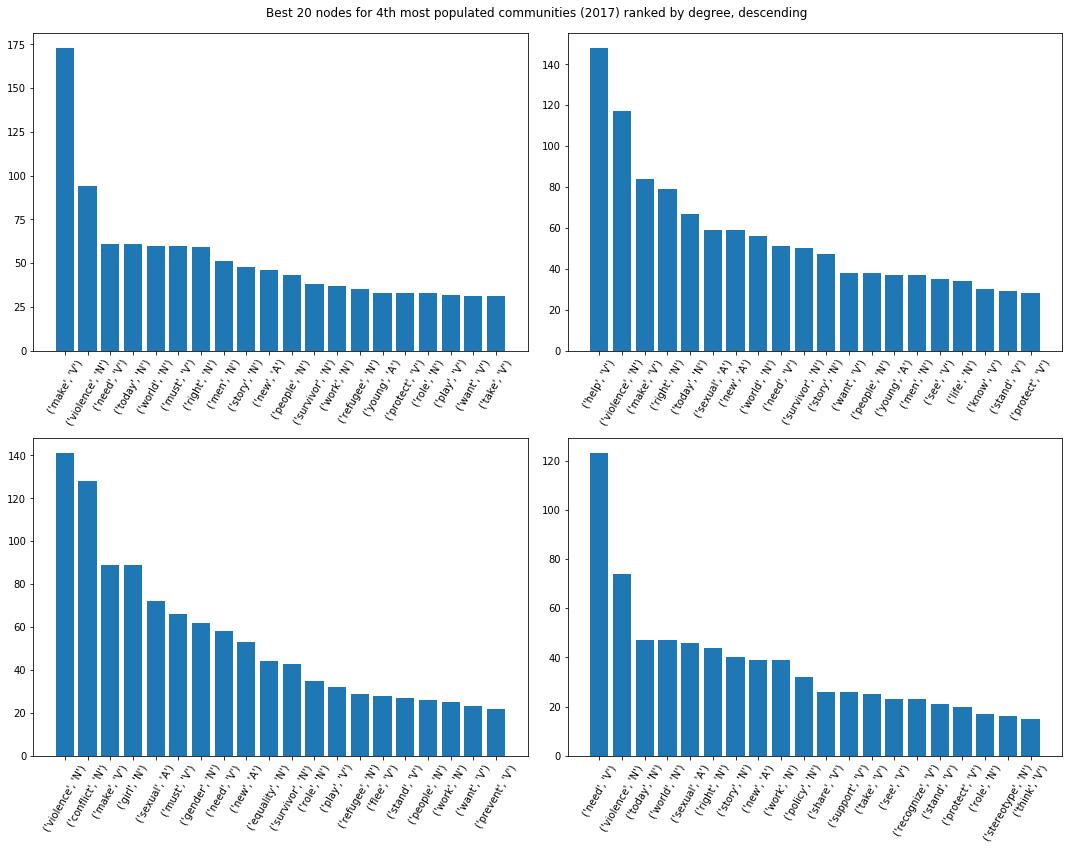

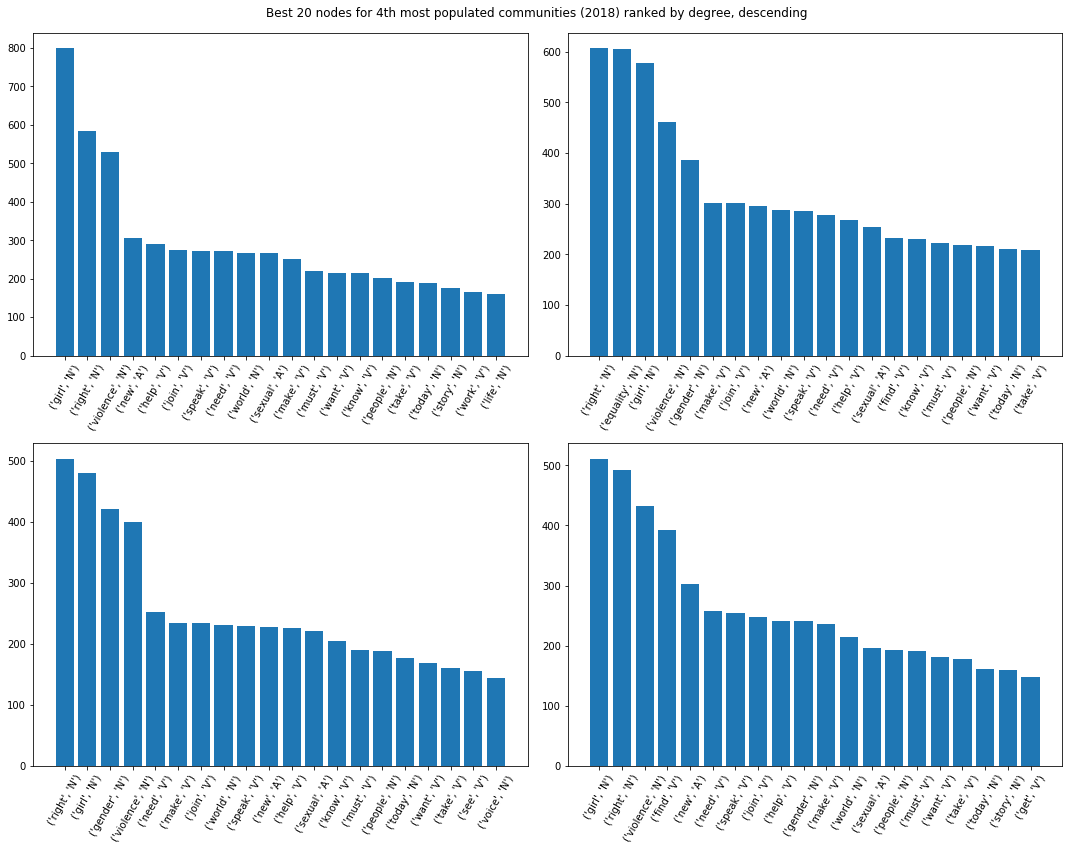

In [11]:
# MCL communities analysis
best = 20 

for i, net in enumerate(nets):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))    
    axs = axs.ravel()
    if not i: _ = fig.suptitle('Best 20 nodes for 4th most populated communities (2017) ranked by degree, descending')
    if i: _ = fig.suptitle('Best 20 nodes for 4th most populated communities (2018) ranked by degree, descending')
    clust = mcl_clusters[i][:4]
    for j,c in enumerate(clust):
        degrees = pd.Series({node: val for node, val in net.subgraph(c).degree()}).sort_values(ascending=False).iloc[:best]        
        _ = axs[j].bar(degrees.index.map(lambda x: str(i2w[i][x])), degrees.values)
        _ = axs[j].tick_params(axis='x', labelrotation=60)
    _ = plt.tight_layout()
    _ = plt.subplots_adjust(top=0.95) 
    _ = plt.show()

# Louvain clustering 

In [12]:
# Compute clusters for both nets

partition_2017 = community.best_partition(net_2017)
partition_2018 = community.best_partition(net_2018)

partitions = [pd.Series(partition_2017),pd.Series(partition_2018)]

In [13]:
# Print words contained in each cluster

for i in [0,1]:
    if not i: print( '2017\'s network:')
    if i: print( '\n2018\'s network:')
    partitions[i] = pd.Series(partitions[i],index = partitions[i].keys()) 
    comms = partitions[i].groupby(by = partitions[i].iloc[:])

    print('Number of clusters:', len(comms), end='\n\n')
    for j, c in enumerate(comms):
        print('Cluster #{}'.format(j+1))
        print('\tCluster cardinality: ', len(c[1]))
        print('\t', [i2w[i][node] for node in c[1].index], end='\n\n')

2017's network:
Number of clusters: 31

Cluster #1
	Cluster cardinality:  116
	 [('19th-century', 'A'), ('achieve', 'V'), ('address', 'V'), ('agreement', 'N'), ('answer', 'N'), ('appreciate', 'V'), ('area', 'N'), ('ban', 'N'), ('billion', 'N'), ('blog', 'N'), ('businesswoman', 'N'), ('capacity', 'N'), ('case', 'N'), ('commend', 'V'), ('consequence', 'N'), ('contribution', 'N'), ('cooperation', 'N'), ('coordination', 'N'), ('crush', 'V'), ('dangerous', 'A'), ('deserve', 'V'), ('design', 'N'), ('doctor', 'N'), ('earthquake', 'N'), ('energy', 'N'), ('entire', 'A'), ('essay', 'N'), ('ever', 'R'), ('everywhere', 'R'), ('exclude', 'V'), ('finally', 'R'), ('flexible', 'A'), ('frustratingly', 'R'), ('function', 'N'), ('gender-perspective', 'N'), ('gradually', 'R'), ('greatly', 'R'), ('high', 'A'), ('highlight', 'V'), ('highly', 'R'), ('hope', 'V'), ('humanity', 'N'), ('humility', 'N'), ('implementation', 'N'), ('include', 'V'), ('inclusion', 'N'), ('inclusiveness', 'N'), ('incorporate', 'V'), 

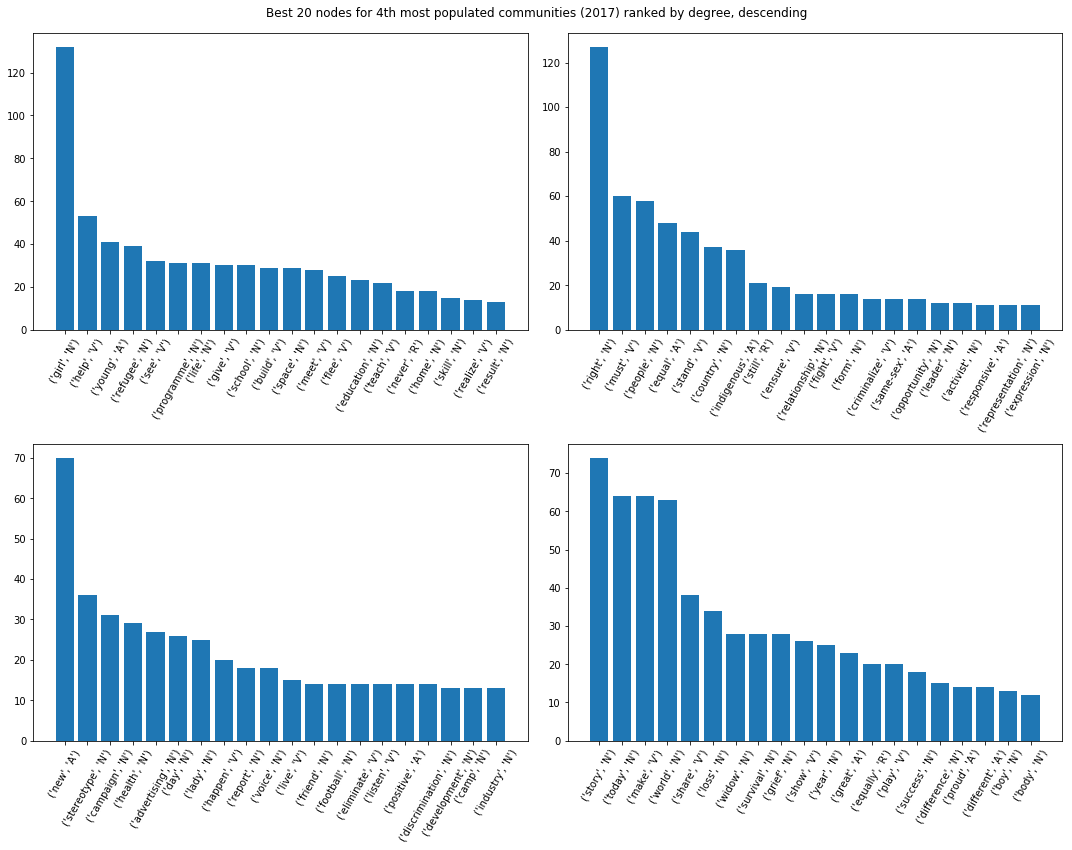

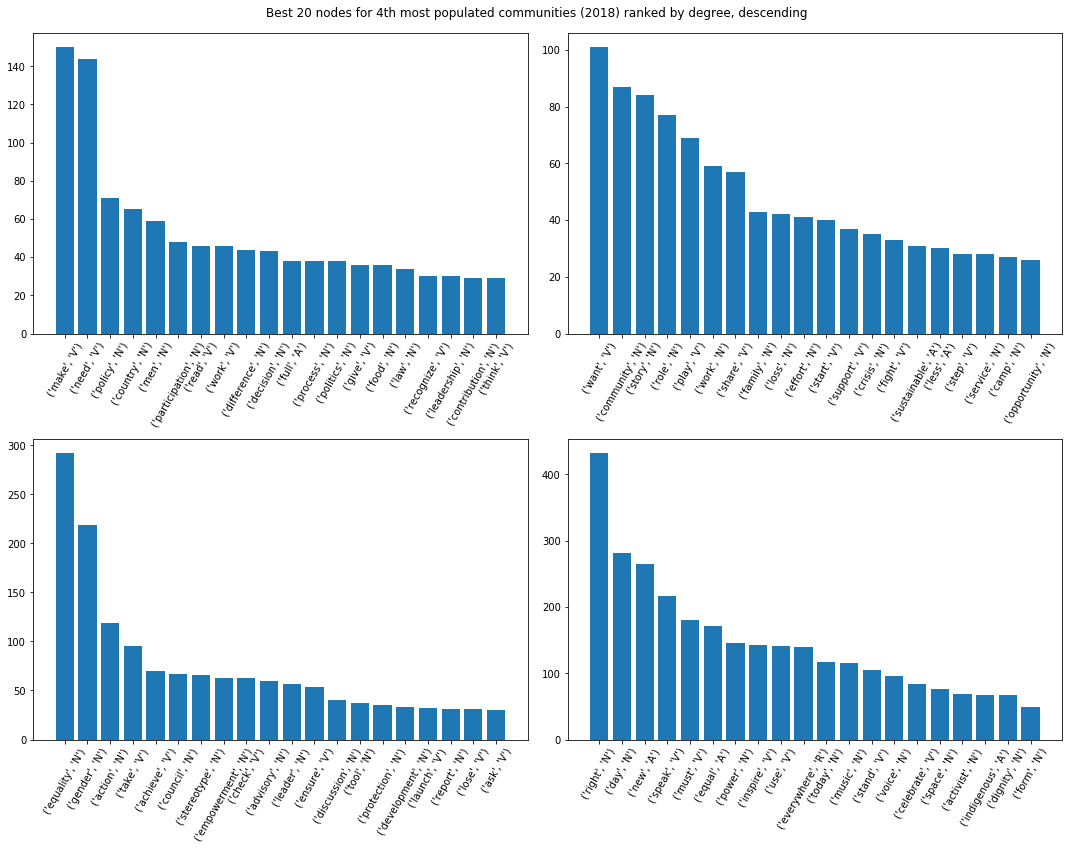

In [14]:
# Louvain communities analysis

best = 20 

for i, net in enumerate(nets):
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))    
    axs = axs.ravel()
    if not i: _ = fig.suptitle('Best 20 nodes for 4 most populated communities (2017) ranked by degree, descending')
    if i: _ = fig.suptitle('Best 20 nodes for 4 most populated communities (2018) ranked by degree, descending')
    # extract 4 more populated clusters
    best_cls = partitions[i].groupby(by = partitions[i].iloc[:]).size().sort_values(ascending=False).iloc[:4]
    clust = partitions[i][partitions[i].isin(best_cls.index)]
    clust = clust.groupby(by = clust.iloc[:])
    
    for j,c in enumerate(clust):
        degrees = pd.Series({node: val for node, val in net.subgraph(c[1].index.values).degree()}).sort_values(ascending=False).iloc[:best]        
        _ = axs[j].bar(degrees.index.map(lambda x: str(i2w[i][x])), degrees.values)
        _ = axs[j].tick_params(axis='x', labelrotation=60)
    _ = plt.tight_layout()
    _ = plt.subplots_adjust(top=0.95) 
    _ = plt.show()
